## Benchmark

In [1]:
import json
from fbprophet.serialize import model_from_json

with open('smartphones.json', 'r') as fin:
    ph = model_from_json(json.load(fin))  # Carregar o modelo

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet

df = pd.read_csv('dfw.csv')
forecast = pd.read_csv('forecast.csv')

In [3]:
df.index = pd.to_datetime(df['Unnamed: 0'])
df.drop(columns=['Unnamed: 0'], inplace=True)
forecast.index = pd.to_datetime(forecast['ds'])
forecast.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
plt.style.use('fivethirtyeight') # Gráficos utilizando o estilo do site https://fivethirtyeight.com

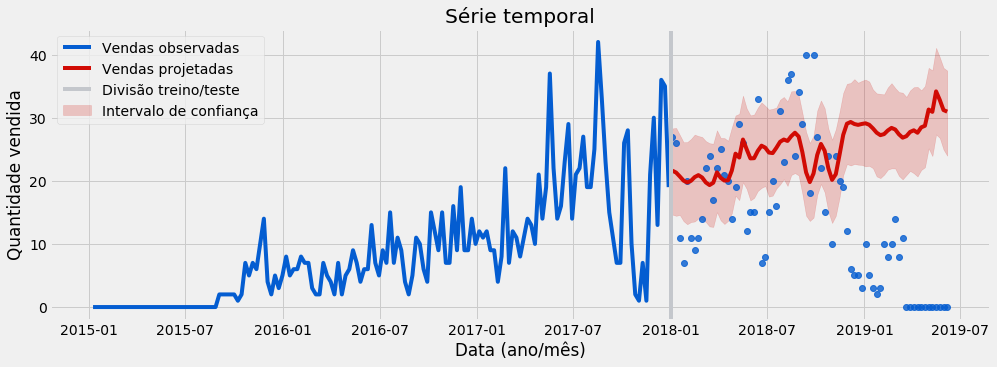

In [5]:
conf = pd.DataFrame({'low': pd.concat([df['j2_prime_successor'][:'2018-01-01'], forecast['yhat_lower']['2018-01-01':]]),
                     'upper': pd.concat([df['j2_prime_successor'][:'2018-01-01'], forecast['yhat_upper']['2018-01-01':]])})
plt.figure(figsize = (15, 5))
plt.plot(df['j2_prime_successor'][:'2018-01-01'], color='#045dd1', label='Vendas observadas')
plt.plot(df['j2_prime_successor']['2018-01-01':], 'o', alpha=0.8, color='#045dd1')
plt.plot(forecast['yhat']['2018-01-01':], color='#d10b04', label='Vendas projetadas')
plt.axvline(x=pd.to_datetime('2018-01-01'), color='#c4c7cc', label='Divisão treino/teste')
plt.fill_between(df.index, y1=conf['low'], y2=conf['upper'], alpha = 0.2, color='#d10b04', label='Intervalo de confiança')
plt.xlabel('Data (ano/mês)')
plt.ylabel('Quantidade vendida')
plt.title('Série temporal')
plt.legend(loc='upper left')